Lasso

lambda is alpha here

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.metrics import mean_squared_error


In [3]:
insurance_data=pd.read_csv("insurance.csv")

x=insurance_data.drop(columns=["charges"])
y=insurance_data["charges"]

#one hot encoding
x=pd.get_dummies(x,columns=["region"], drop_first=True,dtype=int)

x["sex"]=x["sex"].map({"female":1,"male":0})
x["smoker"]=x["smoker"].map({"yes":1,"no":0})

x["age_smoker"]=x["age"]*x["smoker"]
x["bmi_smoker"]=x["bmi"]*x["smoker"]

x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
0,19,1,27.900,0,1,0,0,1,19,27.9
1,18,0,33.770,1,0,0,1,0,0,0.0
2,28,0,33.000,3,0,0,1,0,0,0.0
3,33,0,22.705,0,0,1,0,0,0,0.0
4,32,0,28.880,0,0,1,0,0,0,0.0


In [7]:
#train test split
x_train, x_test, y_train, y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

Lasso model

MSE for alpha=0.001:  20922599.87103596
MSE for alpha=0.2:  20921006.729136664
MSE for alpha=1:  20914832.635089137
MSE for alpha=2:  20908106.77995452
MSE for alpha=3:  20901927.931570224
MSE for alpha=4:  20896130.811135653
MSE for alpha=5:  20890881.000633497
MSE for alpha=6:  20886178.838931832
MSE for alpha=10:  20872844.794796687
MSE for alpha=30:  20937537.133939773
MSE for alpha=40:  21046489.293890778
MSE for alpha=50:  21196929.86960891
MSE for alpha=100:  22423172.68602325


<Axes: >

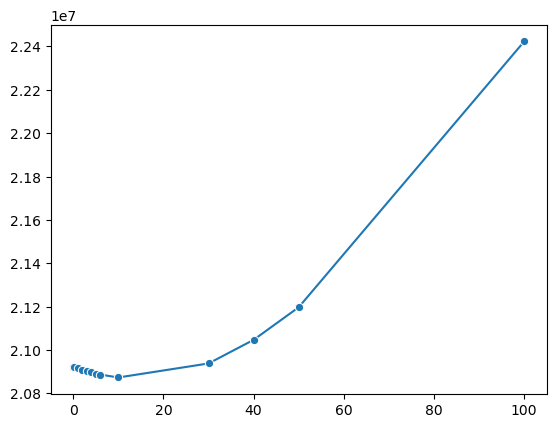

In [10]:
#alpha (lambda)-regularization strength

import seaborn as sns

alphas=[0.001,0.2,1,2,3,4,5,6,10,30,40,50,100]
mses=[]

for a in alphas:
    lasso_model=Lasso(alpha=a)

    lasso_model.fit(x_train, y_train)

    y_pred=lasso_model.predict(x_test)

    mse=mean_squared_error(y_test,y_pred)

    print(f"MSE for alpha={a}: ",mse)

    mses.append(mse)

sns.lineplot(x=alphas,y=mses, marker="o")

Cross Validation

Divide the dataset into multiple equal parts (folds).
Train the model on some parts and test it on the remaining part.
Repeat this process multiple times, each time changing the test part.
Finally, average the results to evaluate model performance.

In [12]:
from sklearn.linear_model import LassoCV
a=[0.001,0.2,1,2,3,4,5,6,10,30,40,50,100]

lasso_cv_model=LassoCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42
)

lasso_cv_model.fit(x_train,y_train)

print("Best Alpha ",lasso_cv_model.alpha_)

y_pred=lasso_cv_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mse ",mse)

Best Alpha  0.001
mse  20922599.87103596
